<a href="https://colab.research.google.com/github/Desmondonam/Time_series/blob/main/prophet_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## Install prophet model
!pip install prophet

In [ ]:
## Import the neccesary libraries that are needed
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

In [ ]:
#Prepare the time series data
data = pd.DataFrame({
    'ds': pd.date_range(start='2023-01-01', periods=12, freq='M'),
    'y': [10, 20, 15, 25, 30, 30, 32, 25, 37, 49, 43, 45]  # Replace with your actual time series data
})

In [ ]:
#Create and fit a model
model = Prophet()
model.fit(data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyisah_am/wzzj1xo9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyisah_am/dg_lxfus.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66607', 'data', 'file=/tmp/tmpyisah_am/wzzj1xo9.json', 'init=/tmp/tmpyisah_am/dg_lxfus.json', 'output', 'file=/tmp/tmpyisah_am/prophet_modeltmr0q47t/prophet_model-20230804052442.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
05:24:42 - cmdstanpy - INFO - Chain [1] start processing
IN

In [ ]:
# forecast future values
future_dates = model.make_future_dataframe(periods=30)  # Forecast for the next 30 days
forecast = model.predict(future_dates)

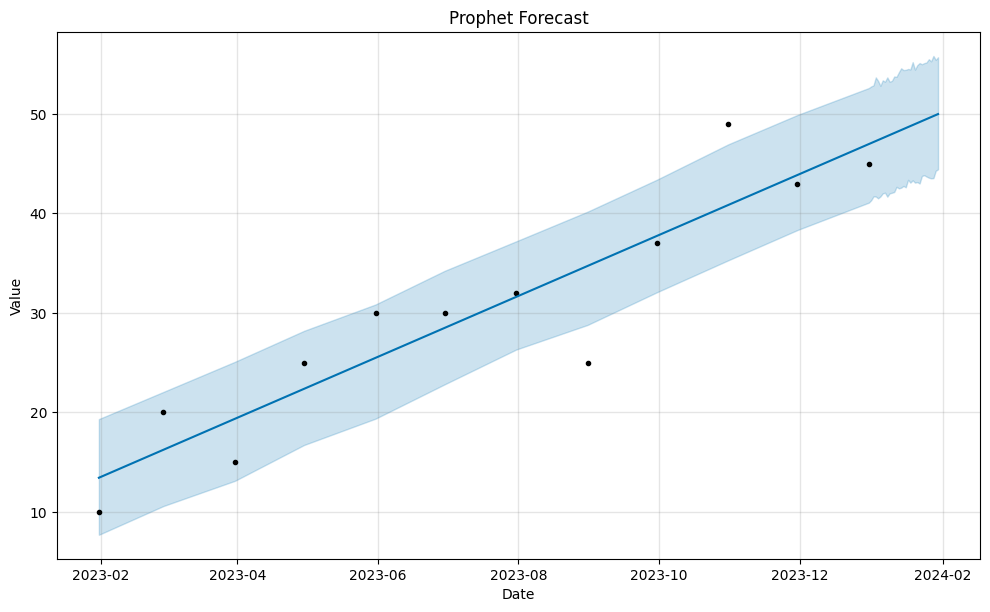

In [ ]:
## Visualize the forecast
model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Prophet Forecast')
plt.show()

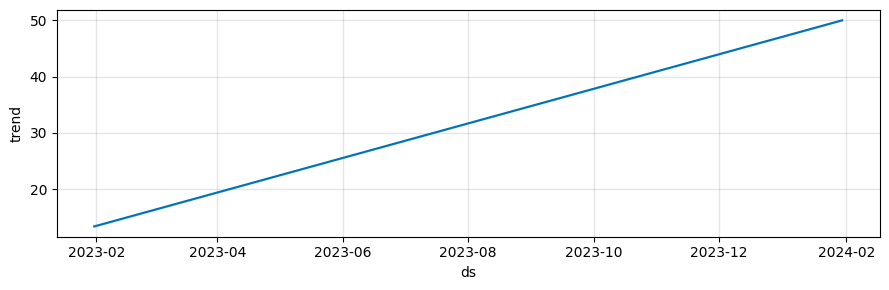

In [ ]:
## Components of the forecast
model.plot_components(forecast)
plt.show()

In [ ]:
## adding holidays and special events
holidays = pd.DataFrame({
    'holiday': 'New Year',
    'ds': pd.to_datetime(['2023-01-01', '2024-01-01', '2025-01-01']),
    'lower_window': 0,
    'upper_window': 1,
})
model = Prophet(holidays=holidays)
model.fit(data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyisah_am/7n4qp8bc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyisah_am/bqzh0cjk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20555', 'data', 'file=/tmp/tmpyisah_am/7n4qp8bc.json', 'init=/tmp/tmpyisah_am/bqzh0cjk.json', 'output', 'file=/tmp/tmpyisah_am/prophet_modele4iqx7z2/prophet_model-20230804052652.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
05:26:52 - cmdstanpy - INFO - Chain [1] start processing
IN

In [ ]:
# Handling seasonality and uncertainity
forecast = model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2023-01-31,13.413407,7.919311,18.918640
1,2023-02-28,16.226586,10.997688,22.120694
2,2023-03-31,19.341177,13.554447,25.153398
3,2023-04-30,22.355298,16.557626,27.461226
4,2023-05-31,25.469889,19.628678,30.748468
5,2023-06-30,28.484010,22.933624,34.132692
6,2023-07-31,31.598601,26.070048,37.303172
7,2023-08-31,34.713192,28.984072,41.083450
8,2023-09-30,37.727313,32.069090,43.332022
9,2023-10-31,40.841904,34.701642,46.482727
